In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('//kaggle//input//red-wine-quality-cortez-et-al-2009//winequality-red.csv')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [6]:
print(dataset.isnull())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

In [7]:
dataset['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1144            7.3             0.320         0.23             2.3      0.066   
73              8.3             0.675         0.26             2.1      0.084   
446            12.5             0.380         0.60             2.6      0.081   
399             8.7             0.765         0.22             2.3      0.064   
647             8.3             0.845         0.01             2.2      0.070   
...             ...               ...          ...             ...        ...   
715             7.2             0.490         0.18             2.7      0.069   
905             9.2             0.580         0.20             3.0      0.081   
1096            6.6             0.725         0.09             5.5      0.117   
235             7.2             0.630         0.00             1.9      0.097   
1061            9.1             0.400         0.50             1.8      0.071   

      free sulfur dioxide  

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)
print(x_test)

[[-0.56794375 -1.18088385 -0.19241296 ...  0.73249574 -0.22553894
  -0.31915735]
 [-0.00940983  0.80065564 -0.04123135 ... -0.03016065 -0.75844691
  -1.15783431]
 [ 2.33643265 -0.84597577  1.67216021 ... -1.36480934  0.42579302
   0.05358797]
 ...
 [-0.9589175   1.07974571 -0.89792713 ...  0.22405814 -0.9952949
   0.33314696]
 [-0.62379715  0.54947458 -1.35147195 ...  0.35116754 -0.46238693
  -1.34420697]
 [ 0.43741731 -0.73433974  1.16822152 ... -0.66570765  0.18894504
   1.91731456]]
[[ 0.26985713 -0.67852173  1.87373569 ...  1.43159743  0.01130905
   0.05358797]
 [ 0.21400374  0.54947458  0.05955639 ... -0.34793415 -0.16632694
  -0.22597102]
 [ 1.16351141 -1.06924782  1.57137247 ... -0.79281704  0.24815703
   0.7990786 ]
 ...
 [-0.62379715 -0.95761179  0.96664604 ...  0.54183164  1.13633698
   0.51951962]
 [-1.51745143  0.46574755 -1.35147195 ...  1.68581622 -0.81765891
  -0.50553001]
 [ 1.94545891 -1.12506584  1.11782765 ... -0.09371535  0.60342901
   0.23996063]]


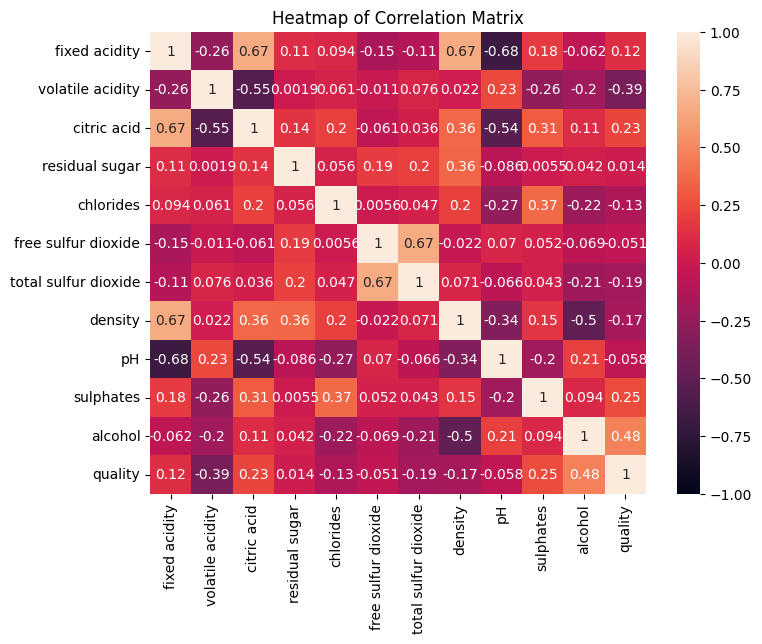

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()
